<h5>Importing libraries</h5>

In [2]:
#data handling
import pandas as pd
import numpy as np
import os 
from PIL import Image

# Machine learning (non deep learning)
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder 

# Deep learning
import tensorflow as tf
import keras
from keras import layers
from keras_preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

# plotting
import seaborn as sns
import matplotlib.pyplot as plt

# misc
import time # for recording model training time

<h5>Read in images into numpy arrays and record type of tumor with one hot encoder</h5>

In [3]:
img_reshape_size = (32,32)

data = []
result = []

encoder = OneHotEncoder()
encoder.fit([[0], [1], [2], [3]])  # 0 = no tumor, 1 = meningioma tumor, 2 = glioma tumor , 3 = pitulitary tumor

# path to non tumor files
no_tumor_image_dir = "dataset/split_data/multi-class/no_tumor"
no_tumor_files = os.listdir(no_tumor_image_dir)

# path to meningioma files
meningioma_image_dir = "dataset/split_data/multi-class/meningioma_tumor"
meningioma_files = os.listdir(meningioma_image_dir)

# path to glioma files
glioma_image_dir = "dataset/split_data/multi-class/glioma_tumor"
glioma_files = os.listdir(glioma_image_dir)

# path to pitulitary files
pitulitary_image_dir = "dataset/split_data/multi-class/pitulitary_tumor"
pitulitary_files = os.listdir(pitulitary_image_dir)


print("lengths of the tumors files")
print("length of meningioma tumor files " + str(len(meningioma_files)))
print("length of glioma tumor files " + str(len(glioma_files)))
print("length of pitulitary tumor files " + str(len(pitulitary_files)))
print("length of non-tumor files " + str(len(no_tumor_files)))
print("total files is " + str(len(meningioma_files)+len(glioma_files)+len(pitulitary_files)+len(no_tumor_files)))
# should be 3000 files in total


# could be looped to reduce amount of code

## No tumor ##
for file in no_tumor_files:
    temp_file_path = no_tumor_image_dir + "/" +file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[0]]).toarray())

## Meningioma tumor ## 
for file in meningioma_files:
    temp_file_path = meningioma_image_dir + "/" + file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[1]]).toarray())
       
## Glioma tumor ##
for file in glioma_files:
    temp_file_path = glioma_image_dir + "/"  +file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[2]]).toarray())
        
## Pitulitary tumor ##     
for file in pitulitary_files:
    temp_file_path = pitulitary_image_dir + "/"  +file
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    data.append(np.array(img))
    result.append(encoder.transform([[3]]).toarray())

lengths of the tumors files
length of meningioma tumor files 855
length of glioma tumor files 860
length of pitulitary tumor files 831
length of non-tumor files 454
total files is 3000


<h5>Reshape data and split between test and train data</h5>

In [4]:
data = np.array(data)
result = np.array(result)
result = result.reshape(3000,4)
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.1, shuffle=True, random_state=5)

<h5>Build the CNN model</h5>

In [5]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(32, 32, 1), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='Adamax',  metrics = ['accuracy'])
#print(model.summary())

<h5>Train the model and record time to train</h5>

In [6]:
start_time = time.time()
history = model.fit(x_train, y_train, epochs = 300, batch_size = 8, verbose=1, validation_data = (x_test, y_test), callbacks=[callback])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/300
338/338 [==============================] - 6s 15ms/step - loss: 1.4200 - accuracy: 0.5359 - val_loss: 0.8677 - val_accuracy: 0.6167
Epoch 2/300
338/338 [==============================] - 5s 16ms/step - loss: 0.8857 - accuracy: 0.6359 - val_loss: 0.9364 - val_accuracy: 0.6200
Epoch 3/300
338/338 [==============================] - 5s 15ms/step - loss: 0.8183 - accuracy: 0.6622 - val_loss: 0.6592 - val_accuracy: 0.7200
Epoch 4/300
338/338 [==============================] - 5s 15ms/step - loss: 0.7323 - accuracy: 0.6796 - val_loss: 0.6482 - val_accuracy: 0.7267
Epoch 5/300
338/338 [==============================] - 5s 16ms/step - loss: 0.6920 - accuracy: 0.7037 - val_loss: 0.6291 - val_accuracy: 0.7567
Epoch 6/300
338/338 [==============================] - 5s 15ms/step - loss: 0.6512 - accuracy: 0.7315 - val_loss: 0.5737 - val_accuracy: 0.7700
Epoch 7/300
338/338 [==============================] - 5s 15ms/step - loss: 0.6062 - accuracy: 0.7496 - val_loss: 0.5442 - val_accuracy:

<h5>Plot accuracy over epochs</h5> 

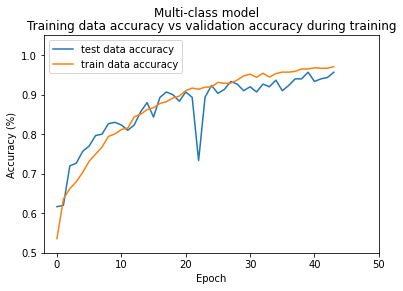

In [29]:
plt.plot(history.history['val_accuracy'], label="test data accuracy")
plt.plot(history.history['accuracy'], label="train data accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.suptitle('Multi-class model')
plt.title('Training data accuracy vs validation accuracy during training')
ax = plt.gca()
ax.set_xlim([-2, 50])
ax.set_ylim([0.5, 1.05])
plt.legend()
plt.show()

<h6>Some basic results recording, just for keeping information to hand</h6>

94.34445095062256 seconds --- 30 epochs , 0.9033 acc , 32x32 RGB image (images are still in greyscale, just RGB format)

343.3586163520813 seconds --- 30 epcohs , 0.9182 acc , 64x64 RGB image (images are still in greyscale, just RGB format)

1364.8851137161255 seconds --- 30 epochs , 0.8950 acc , 128x128 Greyscale image

313.81851744651794 seconds --- 30 epochs , 0.8750 acc , 64x64 Greyscale image

87.09897923469543 seconds --- 30 epochs , 0.8833 acc , 32x32 Greyscale image

31.2696533203125 seconds --- 30 epochs , 0.8200 acc , 16x16 Greyscale image

183.15469479560852 seconds --- 60 epochs , 0.9117 acc , 32x32 Greyscale image

<h5>Read in the validation data in the same way we read in the training and testing data</h5>

In [25]:
img_reshape_size = (32,32)

validation_data = []
validation_result = []

encoder = OneHotEncoder()
encoder.fit([[0], [1], [2], [3]]) 

# path to non tumor files
no_tumor_image_dir = "test_dataset/test/split_data/multi-class/no_tumor"
no_tumor_files = os.listdir(no_tumor_image_dir)

# path to meningioma files
meningioma_image_dir = "test_dataset/test/split_data/multi-class/meningioma_tumor"
meningioma_files = os.listdir(meningioma_image_dir)

# path to glioma files
glioma_image_dir = "test_dataset/test/split_data/multi-class/glioma_tumor"
glioma_files = os.listdir(glioma_image_dir)

# path to pitulitary files
pitulitary_image_dir = "test_dataset/test/split_data/multi-class/pitulitary_tumor"
pitulitary_files = os.listdir(pitulitary_image_dir)

all_tumor_files_ordered = [] # to find the path of the hardest images

for file in no_tumor_files:
    temp_file_path = no_tumor_image_dir + "/" +file
    all_tumor_files_ordered.append(temp_file_path)
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    validation_data.append(np.array(img))
    validation_result.append(encoder.transform([[0]]).toarray())

for file in meningioma_files:
    temp_file_path = meningioma_image_dir + "/" + file
    all_tumor_files_ordered.append(temp_file_path)
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    validation_data.append(np.array(img))
    validation_result.append(encoder.transform([[1]]).toarray())
        
for file in glioma_files:
    temp_file_path = glioma_image_dir + "/"  +file
    all_tumor_files_ordered.append(temp_file_path)
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    validation_data.append(np.array(img))
    validation_result.append(encoder.transform([[2]]).toarray())
        
        
for file in pitulitary_files:
    temp_file_path = pitulitary_image_dir + "/"  +file
    all_tumor_files_ordered.append(temp_file_path)
    img = Image.open(temp_file_path).convert('L')
    img = img.resize(img_reshape_size)
    img = np.array(img)
    validation_data.append(np.array(img))
    validation_result.append(encoder.transform([[3]]).toarray())
     

<h5>reshape validation data</h5>

In [9]:
validation_data = np.array(validation_data)
validation_result = np.array(validation_result)
validation_result = validation_result.reshape(200,4)

<h5>Get and print scores</h5>

In [10]:
scores = model.evaluate(validation_data, validation_result, verbose=10)

In [11]:
print("test loss: " + str(scores[0]))
print("test accuracy: " + str(scores[1]))

test loss: 0.3009167015552521
test accuracy: 0.9449999928474426


In [14]:
def get_tumor_name(num):
        if num == 0:
            return("no tumor")
        if num == 1:
            return("meningioma")
        if num == 2:
            return("glioma")
        if num == 3:
            return("pitulitary")

In [18]:
difficult_images = []
for i in range(len(validation_result)):
    img = np.expand_dims(validation_data[i], axis = 0)
    if (np.argmax(model.predict(img)) != np.argmax(validation_result[i])):
        difficult_images.append(i)
        print(str(i),"predicted : " , get_tumor_name(np.argmax(model.predict(img))) , ". truth :" , get_tumor_name(np.argmax(validation_result[i])))

54 predicted :  pitulitary . truth : meningioma
58 predicted :  pitulitary . truth : meningioma
74 predicted :  pitulitary . truth : meningioma
97 predicted :  pitulitary . truth : meningioma
104 predicted :  glioma . truth : meningioma
107 predicted :  no tumor . truth : glioma
110 predicted :  no tumor . truth : glioma
111 predicted :  meningioma . truth : glioma
113 predicted :  meningioma . truth : glioma
120 predicted :  no tumor . truth : glioma
141 predicted :  meningioma . truth : glioma


In [30]:
difficult_images # images multiple classifiers got wrong

[54, 58, 74, 97, 104, 107, 110, 111, 113, 120, 141]

In [31]:
images_loc = [54,58,74,97,107,110,111,120]

In [32]:
for i in images_loc:
    print(all_tumor_files_ordered[i])

test_dataset/test/split_data/multi-class/meningioma_tumor/IMAGE_0055.jpg
test_dataset/test/split_data/multi-class/meningioma_tumor/IMAGE_0062.jpg
test_dataset/test/split_data/multi-class/meningioma_tumor/IMAGE_0120.jpg
test_dataset/test/split_data/multi-class/meningioma_tumor/IMAGE_0186.jpg
test_dataset/test/split_data/multi-class/glioma_tumor/IMAGE_0009.jpg
test_dataset/test/split_data/multi-class/glioma_tumor/IMAGE_0031.jpg
test_dataset/test/split_data/multi-class/glioma_tumor/IMAGE_0035.jpg
test_dataset/test/split_data/multi-class/glioma_tumor/IMAGE_0073.jpg
